----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

<h1><center>
    
Practical exam on Computer Vision
 
(February, 6th, 2023 )
</center></h1>    

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Esta es la parte práctica del examen final de Visión artificial, curso 2022-23. 

El examen práctico debería ser resuelto en un máximo de 2 horas. Para aprobar la asignatura se han de aprobar ambas partes, teórica y práctica. Cada ejercicio se encuentra definido con su correspondiendiente puntuación. Priorice adecuadamente. 

Tengase en cuenta que no es tan importante que el resultado final sea exactamente igual a los ejemplos que pueden proporcionarse en los enunciados, sino que se tendrá en cuenta cómo el alumno resuelve el problema.

----------------------------------------------------------------------------------------------------

In [125]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage import exposure # To get histogram of images
from skimage.transform import resize
from skimage.color.adapt_rgb import adapt_rgb, each_channel # To apply Gaussian on RGB images
from skimage import filters # To use filters like Gaussian, Roberts, etc...
from skimage.util import random_noise # To add noise 
from skimage import feature # To apply Canny
import matplotlib.animation as animation

### FACE DETECTION
from skimage.feature import haar_like_feature
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature
from skimage.transform import integral_image

%matplotlib inline

@adapt_rgb(each_channel) # Decorator from Scikit Image to process rgb images on filtering
def gaussian_each(image, sigma): # Pass each of the RGB channels to the filter one-by-one, and stitch the results back into an RGB image.
    return filters.gaussian(image, sigma)


## Ejercicio 1

**Ex1.1** (0.5 pt) Lee la imagen `./images_exam/contrast_example.jpg`. Convierte la imagen a escala de grises, imprime las características de las dos imagen (tamaño, tipo de datos, valor máximo y mínimo). **¿Consideras que la imagen en escala de grises es una imagen de bajo contraste?**

Muestra la imagen a color y en escala de grises en la misma figura, **ambas sin el realce de contraste automático que realiza la función `imshow()`**, con el título que indica de qué tipo de imagen se trata. 

_______ORIGINAL_______ 
Image size:  (360, 640, 3) 
Image data type:  uint8 
Minimal value:  70 
Maximal vlaue:  241

_______GRAYSCALE_______ 
Image size:  (360, 640) 
Image data type:  float64 
Minimal value:  0.3792270588235294 
Maximal vlaue:  0.897126274509804


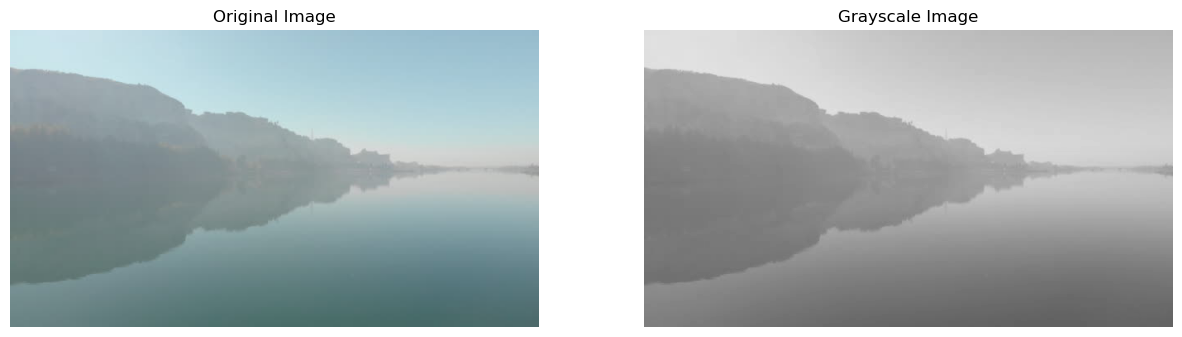

In [95]:
# your solution here

#open the image
im = io.imread('./images_exam/contrast_example.jpg')

#print the information that we need
print("_______ORIGINAL_______",
'\nImage size: ', im.shape,
'\nImage data type: ', im.dtype,
"\nMinimal value: ", im.min(),
"\nMaximal vlaue: ", im.max())


im_gs = rgb2gray(im) #converting to grayscale

#print the information that we need
print("\n_______GRAYSCALE_______",
'\nImage size: ', im_gs.shape,
'\nImage data type: ', im_gs.dtype,
"\nMinimal value: ", im_gs.min(),
"\nMaximal vlaue: ", im_gs.max())

#showing images
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,2,1)
ax.title.set_text('Original Image')
ax.axis('off')
plt.imshow(im, vmin = 0, vmax = 255)

ax = fig.add_subplot(1,2,2)
ax.title.set_text('Grayscale Image')
ax.axis('off')
plt.imshow(im_gs, vmin = 0, vmax = 1, cmap='gray')

 >**¿Consideras que la imagen en escala de grises es una imagen de bajo contraste?** </p>
Si, lo considero ya que para que tubiese buen contraste deberia haver mas tonos de gris i solo tenemos de 0.3792270588235294 a 0.897126274509804 en una escala de 0 a 1.

**Ex 1.2** (1.0 pt) Escribe una función que nos permita visualizar los histogramas de cada uno de los tres canales junto con el de la imagen en escala de grises. **Aseguraos** de utilizar el tipo de datos como rango de entrada (**source_range**) en la función `histogram` para poder visualizar correctamente los valores de los bins del histograma. 

Así mismo, limite el eje X a un valor adecuado (por ejemplo, entre [0,1] para imágenes de tipo `float`o [0,255] para imaǵenes de tipo `uint8`). Os mostramos un ejemplo adecuado. 

<img src='./images_notebook/histogramRGB.png'>

Fijaos cómo los valores de los pixels se encuentran centrados en el eje X, tal y como corresponde según los valores máximos y mínimos que os mostrará la figura en el apartado anterior. 

In [106]:
def im_hist(im,  nbins=8) :

    # your solution here
    #we pass the image to grayscale
    gray_im = rgb2gray(im)

    # now we grab rgb channels of original image separately
    r_im = im[:,:,0]  #red channel
    g_im = im[:,:,2]  #green channel
    b_im = im[:,:,1]  #blue channel


    # we pass all images to float
    gray_im = img_as_float(gray_im)
    r_im = img_as_float(r_im)    
    g_im = img_as_float(g_im)
    b_im = img_as_float(b_im)    

    # creating histoghram of every image
    hist_gray = exposure.histogram(gray_im, nbins, 'dtype')
    hist_r = exposure.histogram(r_im, nbins, 'dtype')
    hist_g = exposure.histogram(g_im, nbins, 'dtype')
    hist_b = exposure.histogram(b_im, nbins, 'dtype')
    
    # show all images
    fig, ax = plt.subplots(ncols = 1, figsize = (20, 5))
    width = 0.2 # set width of bins

    bins_gray = np.arange(0, nbins) 
    bins_r = bins_gray + width
    bins_g = bins_gray + width * 2 
    bins_b = bins_gray + width * 3 

    # show histograms
    # i made the column gray because I think it's better to see the information clearer, 
    # but if you want to see it in GreenYellow as the examble just comment this line an uncomment the one after this
    ax.bar(bins_gray, hist_gray[0], width=0.2, color='gray') 
    # ax.bar(bins_gray, hist_gray[0], width=0.2, color='GreenYellow') 
    ax.bar(bins_r, hist_r[0], width=0.2, color='red')
    ax.bar(bins_g, hist_g[0], width=0.2, color='green')
    ax.bar(bins_b, hist_b[0], width=0.2, color='blue')
    # setting title of each histogram
    ax.set_title('Histogram with ' + str(nbins) + ' bins')

    # we make a legend so it's easy to see which variable is which
    ax.legend(['Gray','Red', 'Green', 'Blue'])

    fig.tight_layout()
    #plt.xlim(0.0,1.0)
    #plt.ylim(0.0,1.0)
    #ax.set_xlim([0.0, 1.0])
    #ax.set_ylim([0.0, 1.0])
    # no se porque al limitarlo no aparecen las bins
    plt.show()

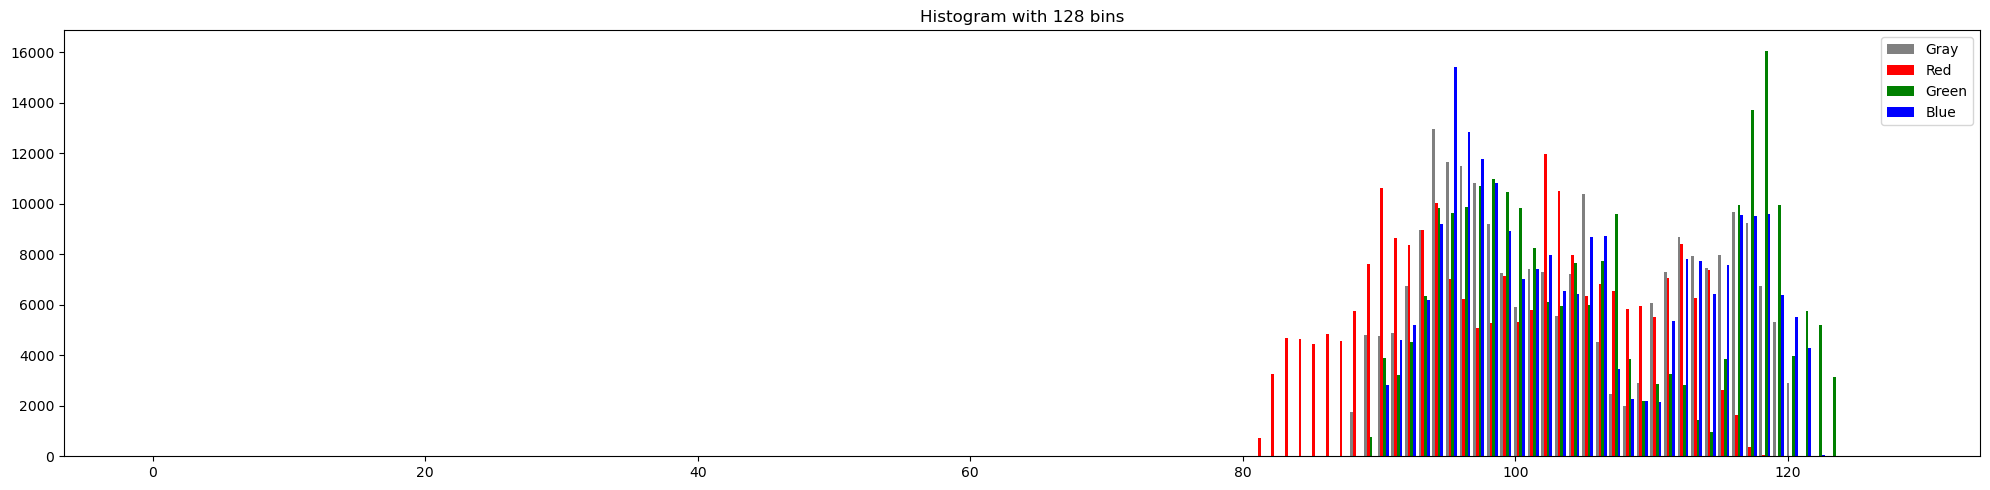

In [107]:
im_hist(im, 128)

**Ex. 1.3** (1.0 pt) Realize una mejora del contraste de la **imagen RGB original**. Para ello hemos visto dos modos, uno manual y otro con una función de `skimage`. **Utiliza ambos.**

Muestra las imágenes antes y después de realizar el realce de contraste, eliminando el realce automático que realiza la función `imshow()`. Muestra el nuevo histrograma de las imágenes. Por ejemplo:

<img src='./images_notebook/realzada.png'>

<img src='./images_notebook/newHistogramRGB.png'>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


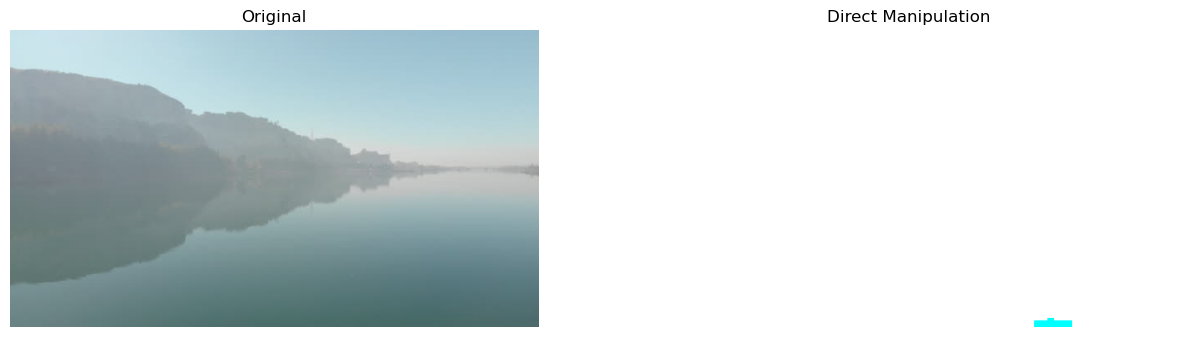

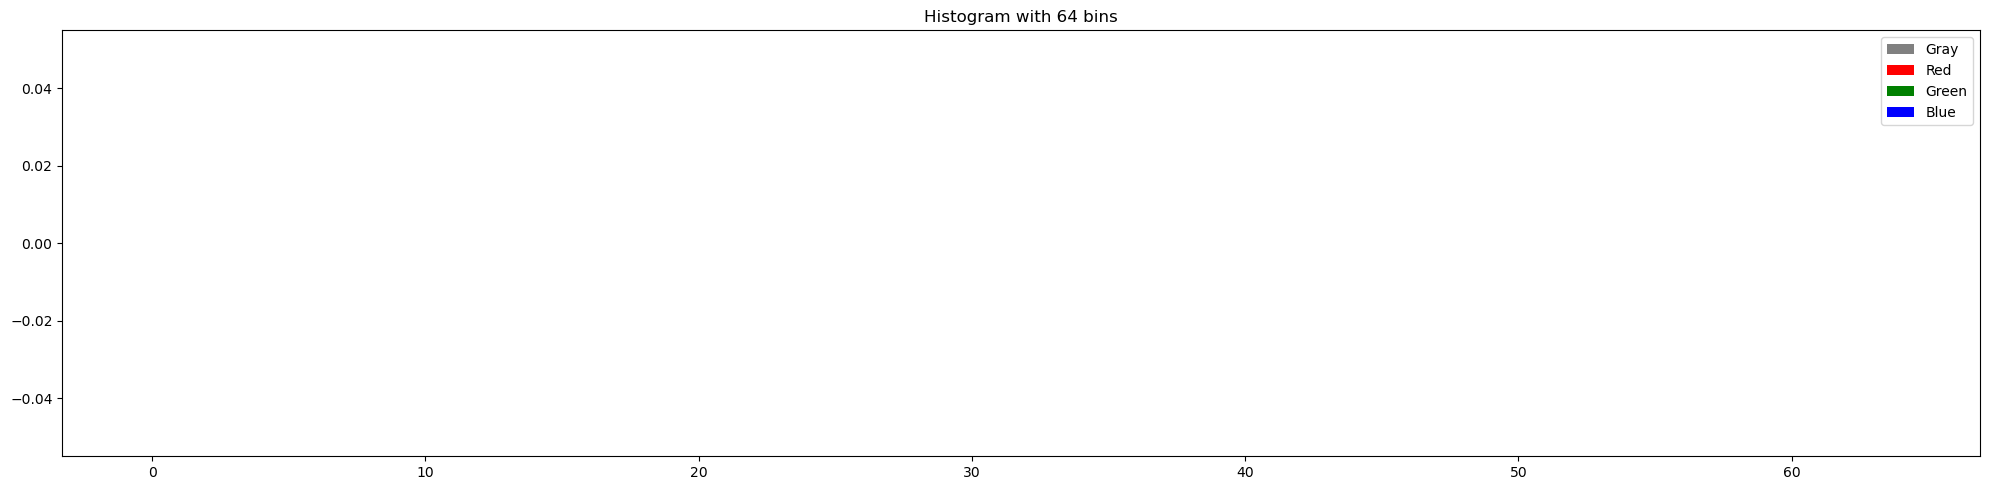

In [108]:
# your solution here (1. Direct manipulation)
direct_manipulation = np.copy(im)
direct_manipulation = (direct_manipulation - direct_manipulation.min() / direct_manipulation.max() - direct_manipulation.min()) * 255
#print(direct_manipulation.dtype) # it is float32
#showing images
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,2,1)
ax.title.set_text('Original')
ax.axis('off')
plt.imshow(im, vmin = 0, vmax = 255)

ax = fig.add_subplot(1,2,2)
ax.title.set_text('Direct Manipulation')
ax.axis('off')
plt.imshow(direct_manipulation, vmin = 0, vmax = 1) #float32

im_hist(direct_manipulation, 64)

#hice la manipulacion directa vista en clase i no funciona


float64


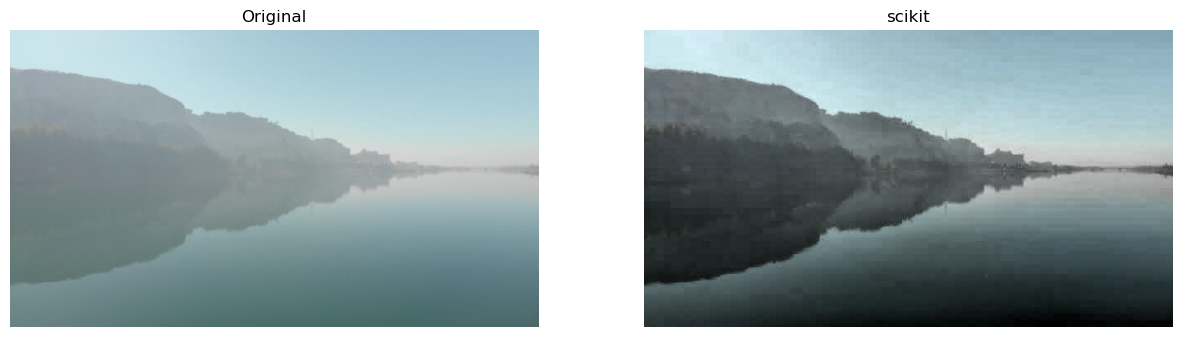

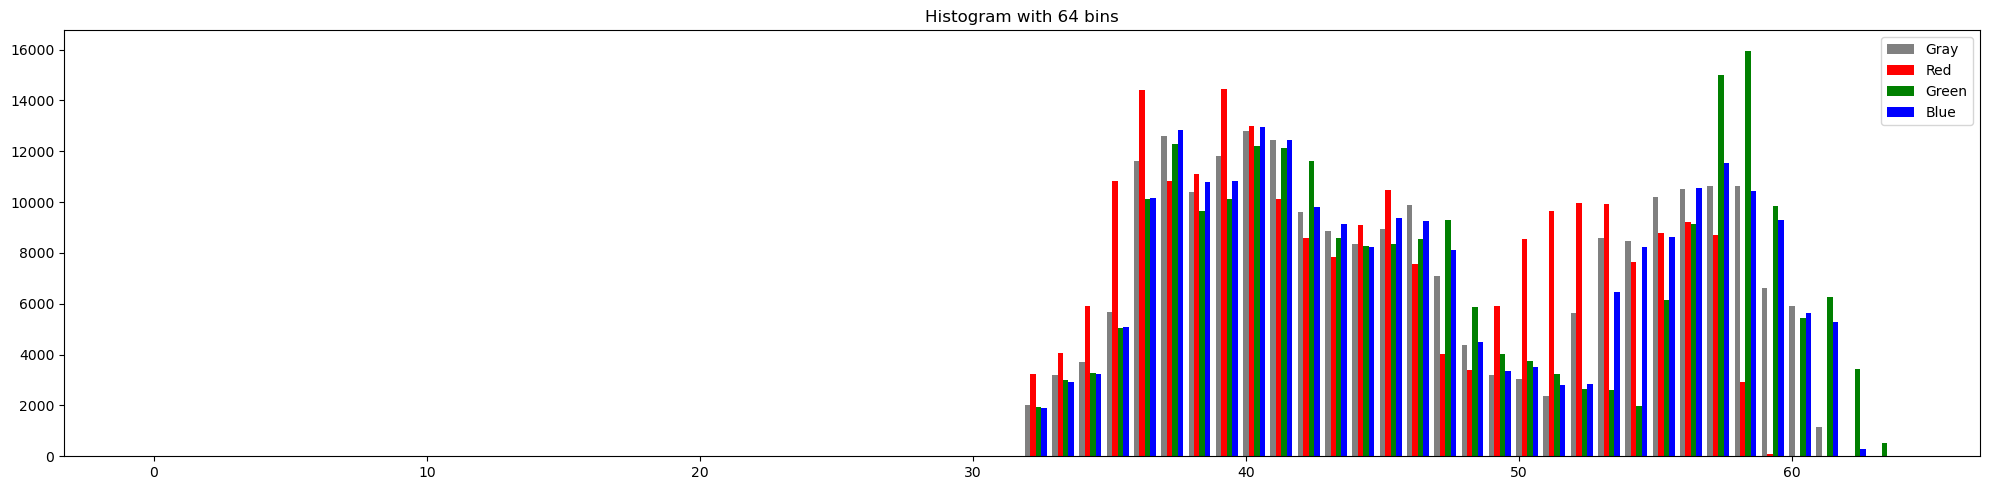

In [89]:
# your solution here (2. scikit)
sc = im.copy()
scikit =  exposure.equalize_adapthist(sc)
print(scikit.dtype) # it is float64
#showing images
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,2,1)
ax.title.set_text('Original')
ax.axis('off')
plt.imshow(im, vmin = 0, vmax = 255)

ax = fig.add_subplot(1,2,2)
ax.title.set_text('scikit')
ax.axis('off')
plt.imshow(scikit, vmin = 0, vmax = 1) #float64

im_hist(scikit, 64)

**Ex 1.4** (0.5 pt) Invierte los canales rojo y azul de la imagen con contraste realzado usando el canal verde de la imagen sin realce. Muestra la imagen original si realce, con realce y la nueva en una sola figura, así como el histograma de la nueva imagen.

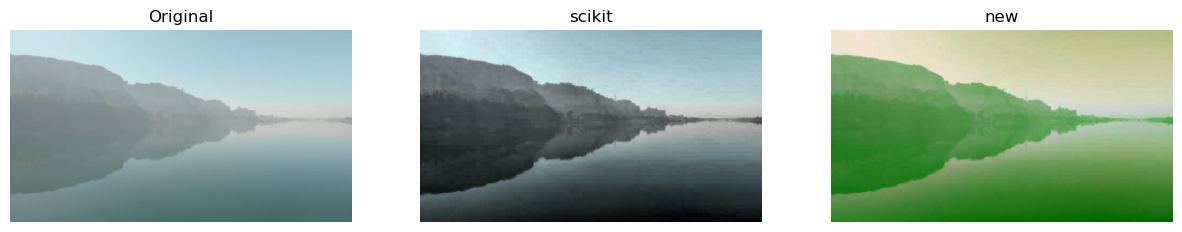

In [94]:
# your solution here
new_im = np.zeros(im.shape, dtype = np.float64)
imf = img_as_float(im)
new_im[:,:,0] = scikit[:,:,2] #el rojo es el azul realzado
new_im[:,:,2] = scikit[:,:,0] #el azul es el rojo realzado
new_im[:,:,1] = imf[:,:,1] #el verde se qeda igual sin realce

#showing images
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,3,1)
ax.title.set_text('Original')
ax.axis('off')
plt.imshow(im, vmin = 0, vmax = 255)

ax = fig.add_subplot(1,3,2)
ax.title.set_text('scikit')
ax.axis('off')
plt.imshow(scikit, vmin = 0, vmax = 1)

ax = fig.add_subplot(1,3,3)
ax.title.set_text('new')
ax.axis('off')
plt.imshow(new_im, vmin = 0, vmax = 1)

## Ejercicio 2

**Ex 2.1** (1.5 pt.) Leed la imagen `images_exam/big_frame.jpg` y aplicad **filtro de media**, **filtro de mediana** y **filtro gausiano**. 

En el filtro de media, utilizaremos una máscara cuadrada 2D para realizar la convolución. En el filtro de mediana, utilizaremos el kernel disk. **Buscad un tamaño de las máscaras adecuado, así como el valor sigma del filtro gausiano necesario,** para reducir el ruido.

Visualizar la imagen original y las resultantes en una sola figura, con sus respectivos títulos. **Comentad brevemente qué hace cada filtro así como cuál puede ser más adecuado para este problema.**

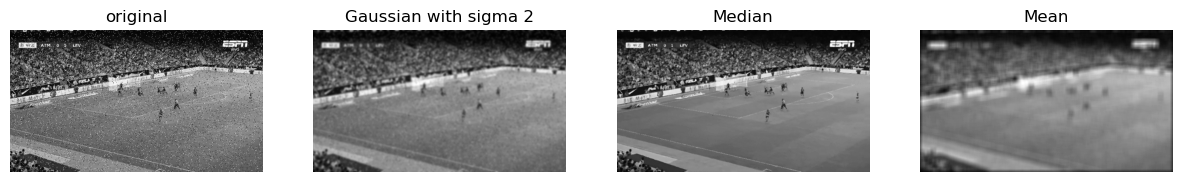

In [114]:
# your solution here
bf = io.imread('./images_exam/big_frame.jpg')

# apply Gaussian filter function from sckit-image with sigma 2
bf_gaussian = np.copy(bf)
bf_gaussian = gaussian_each(bf_gaussian, 2)

#apply mean filter
bf_median = np.copy(bf)
filters.median(bf, out = bf_median)

#apply mean
from skimage import color
from scipy import ndimage # To use the convolve function 
#your solution
# creating a two-dimensional uniform mask with a np.zeros array of 15x15
mask_h2d = np.zeros((15,15), dtype = np.uint8)
# setting all values to 1
mask_h2d[:,:] = 1
# normalize it dividing mask by the sum of all its values
mask_h2d = mask_h2d / np.sum(mask_h2d)
# apply the mask to the grayscale image using standard parameters
bf_convolved = ndimage.convolve(bf, mask_h2d, mode='constant', cval=0.0)


# showing the four images
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(1 ,4, 1)
ax.title.set_text('original')
plt.axis('off')
plt.imshow(bf, cmap = 'gray')

ax = fig.add_subplot(1 ,4, 2)
ax.title.set_text('Gaussian with sigma 2')
plt.axis('off')
plt.imshow(bf_gaussian, cmap = 'gray')

ax = fig.add_subplot(1 ,4, 3)
ax.title.set_text('Median')
plt.axis('off')
plt.imshow(bf_median, cmap = 'gray')

ax = fig.add_subplot(1, 4, 4)
ax.title.set_text('Mean')
plt.axis('off')
plt.imshow(bf_convolved, cmap = 'gray')


**Ex 2.2** (1.5 pt.) Utilizando sólamente el filtro que os parezca más adecuado, vamos a aplicarlo a todo un video. Para ello, carga y visualiza las imágenes que se encuentra en el carpeta `images_exam/video_sp`. Una vez comprobado que todo funciona correctamente (las imágenes han de verse con ruido), aplica el filtro que mejor resultado te haya dado en el apartado anterior para visualizar las imágenes tan limpias como sea posible. 

**Comenta cuál es el filtro más adecuado y por qué.** EL DE MEDIANA YA QUE EL RUIDO ES DE TIPO IMPULSO (CREO) YA QUE NO DISTINGO SI LOS PUNTOS SON SOLO BLANCOS O BLANCOS I NEGROS EN CUYO CASO SERIA TIPO SALT AND PEPPER. PARA AMBOS TIPOS EL FILTRO DE MEDIANA ES MÀS ÒPTIMO

In [122]:
#your solution here
#apply median filter
# Reading a sequence of images from a folder
ic = io.ImageCollection('images_exam/video_sp/*.jpg')

#Changing the pluggin is necessary always when visualizing a video!
%matplotlib nbagg  

#showing original video
fig = plt.figure()  # Create figure
im = plt.imshow(ic[0], animated=True) #Visualize the first image

def run(i):   #Updating the frame visualization
    im.set_array(ic[i]) #Changing the content of the canvas
    return im, #to return a tuple!

plt.show()
ani = animation.FuncAnimation(fig, run, interval=1, blit=True, frames=len(ic), repeat= False)
plt.show()

<IPython.core.display.Javascript object>

In [124]:
#applying median filter to a video:

for frame in ic:
    #we apply median filter to every frame
    filters.median(frame, out = frame) #lo sustituimos por el que lleva filtro

#vemos el video filtrado #Changing the pluggin is necessary always when visualizing a video!
%matplotlib nbagg  

#showing original video
fig = plt.figure()  # Create figure
im = plt.imshow(ic[0], animated=True) #Visualize the first image

def run(i):   #Updating the frame visualization
    im.set_array(ic[i]) #Changing the content of the canvas
    return im, #to return a tuple!

plt.show()
ani = animation.FuncAnimation(fig, run, interval=1, blit=True, frames=len(ic), repeat= False)
plt.show()

<IPython.core.display.Javascript object>

## Ejercicio 3

**Ex 3.1** (0.5 pt) Lee la imagen `./images_exam/template1.jpg`. Haz un resize de la imagen a $24\times24$ pixels. Convierte la imagen a escala de grises y visualiza ambas imágenes en una sola figura. Muestra el tipo de datos y el tamaño de cada una.

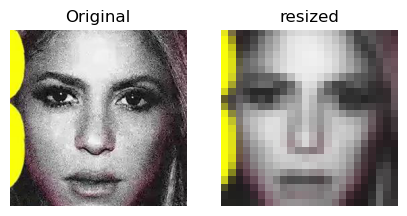

In [100]:
# your solution here
tmp = io.imread('./images_exam/template1.jpg')
tmp_resized = resize(tmp,(24,24))

#showing images
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,2,1)
ax.title.set_text('Original')
ax.axis('off')
plt.imshow(tmp)

ax = fig.add_subplot(1,2,2)
ax.title.set_text('resized')
ax.axis('off')
plt.imshow(tmp_resized)



**Ex 3.2** (1.0 pt) Escribe una función para extraer las características de Haar (*Haar-like features*) de la imagen. Utiliza los siguientes tipos características para probar tu función:

```python
feature_types = ['type-2-x', 'type-2-y',
                 'type-3-x', 'type-3-y',
                 'type-4']
```

Muestra el tamaño del vector de características obtenido.

In [127]:
feature_types = ['type-2-x', 'type-2-y',
                 'type-3-x', 'type-3-y',
                 'type-4']

In [126]:
# your solution here
def extract_feature_image(image, feature_type, feature_coord=None):
    return haar_like_feature(image, 0, 0, image.shape[0], image.shape[1], feature_type, feature_coord)



**Ex 3.3** (1.0 pt) Desde las imágenes de carpetas `./images_exam/Face_noFace/Faces` y `./images_exam/Face_noFace/nFaces` y crea la matriz de características Haar para todo el dataset. Ten en cuenta que antes hemos de hacer la conversión a escala de grises y el resize a $24\times24$ pixel para cada una de las imágenes. Crea también un vector de etiquetas ($0$ - noFaces, $1$ - Faces).

Muestra el tamaño de la matriz de características del dataset y el vector de características.

In [81]:
# your solution here

**Ex. 3.4** (1.0 pt) Vamos a crear nuestra propia función para localizar los vecinos más cercanos, es decir, vamos a hacer un **image retrieval** utilizando las características Haar. Escribir una función `retrieve_images(im_features, feature_vecors, k=5)` que localice los `k` vecinos más cercanos en función a la distancia euclídea de las características.


In [6]:
# your solution here

**Ex. 3.5** (0.5 pt) Utilizando nuestro método, ¿qué probabilidad hay de que la imagen `template1.jpg`sea un rostro? Para ello sólo hemos de calcular la precisión (**accuracy**) de nuestro algoritmo, suponiendo que la imagen template pertenece a la clase $1$ (i.e Faces). 

Prueba tu algoritmo con las imágenes`template1.jpg`, `template2.jpg`, `template3.jpg` y `template4.jpg` que se encuentran en la carpeta`./images_exam/`

<img src='./images_notebook/facesProbability.png'>

In [7]:
# your solution here